<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/YB_0919(1)_exercises_chipotle_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [4]:
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

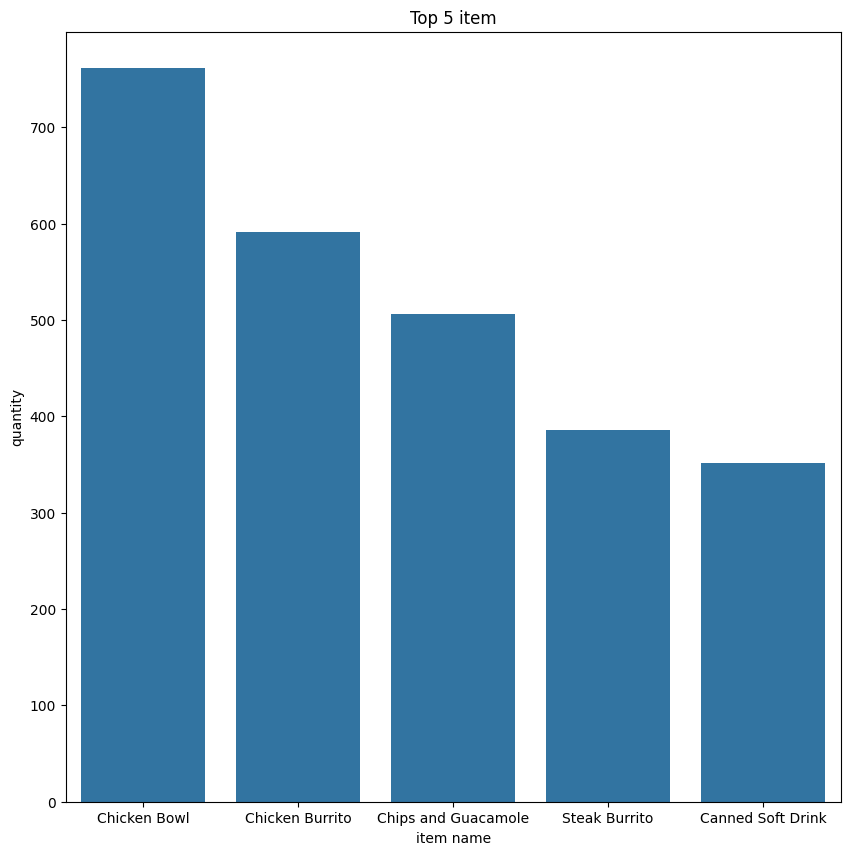

In [29]:
df_sort=df.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
top5=df_sort.head(5)
plt.figure(figsize=(10,10))
sns.barplot(x=top5.index,y=top5.values)
plt.xlabel('item name')
plt.ylabel('quantity')
plt.title('Top 5 item')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

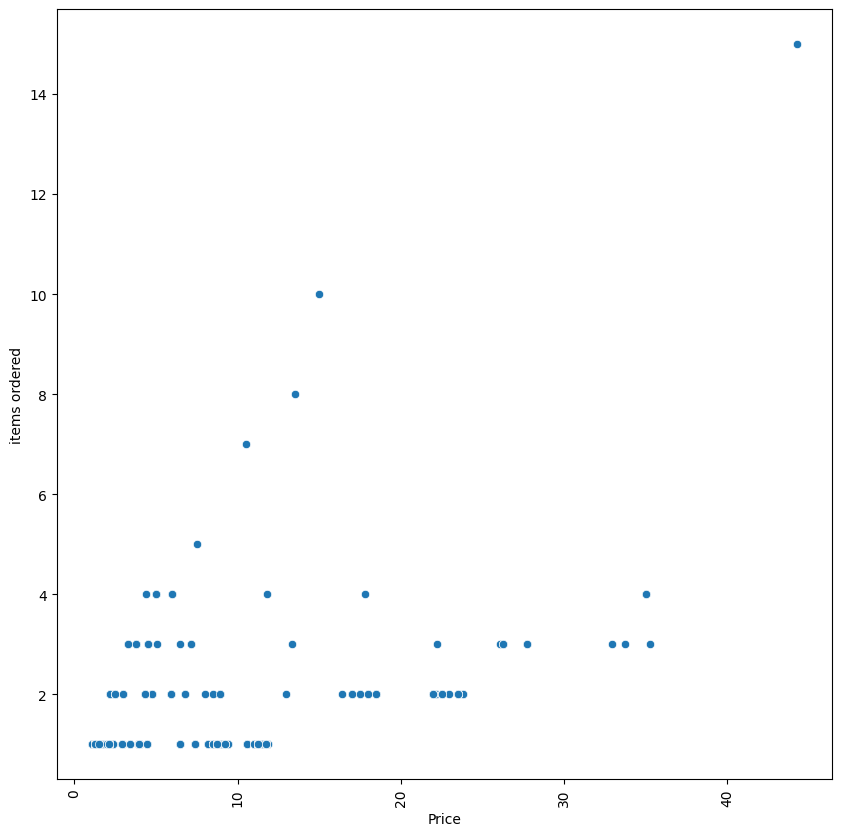

In [17]:
df['item_price'] = df['item_price'].str.replace('$', '', regex=False).astype(float)
plt.figure(figsize=(10,10))
sns.scatterplot(x=df.item_price,y=df.quantity)
plt.xlabel('Price')
plt.ylabel('items ordered')
plt.xticks(rotation='vertical',)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

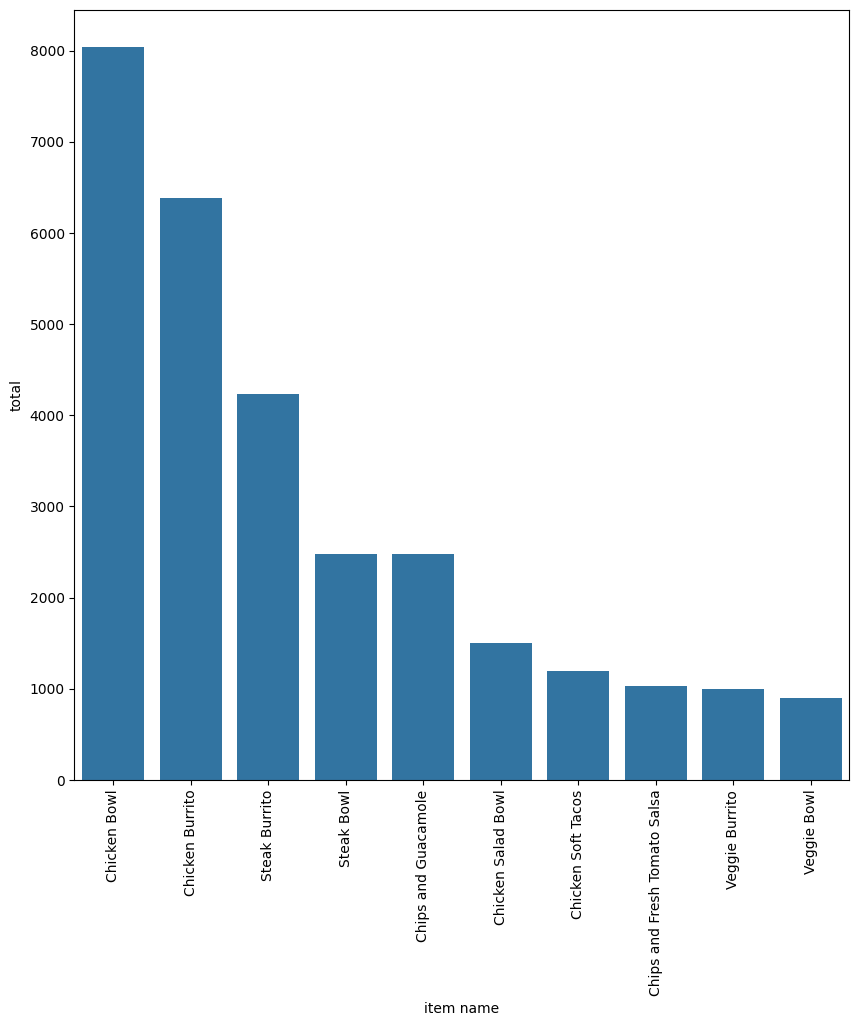

In [26]:
#어떤 품목의 수익이 높을까?
df['total']=df['item_price']*df['quantity']
df_grouped=df.groupby('item_name')['total'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,10))
sns.barplot(x=df_grouped.index,y=df_grouped.values)
plt.xticks(rotation='vertical',)
plt.xlabel('item name')
plt.ylabel('total')
plt.show()